In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import csv
import requests

from datetime import datetime
from bs4 import BeautifulSoup as soup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars News site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Set up HTML Parser
html = browser.html
temps_soup = soup(html, 'html.parser')

In [ ]:
# Source for help with code: https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup

# Create dictionary for table data
mars_temps_dict = {}

# Find table using BeautifulSoup and Splinter
table = temps_soup.find('table', class_='table')

In [ ]:
# Create list to place header row
headers = []
# Use for loop to iterate through table to collect headers
for th in table.find_all("th"):
    headers.append(th.text)

In [ ]:
# Create list to place td data rows
td_rows = []
# Use for loop to iterate through table to collect data
for td in table.find_all('td'):
    td_rows.append(td.text)

In [ ]:
for th in headers:
    for td in td_rows:
        mars_temps_dict = dict(zip(headers, td_rows))
mars_temps_dict

In [ ]:
# Store table into Python data structure
mars_temp_data = []
headers = table.find_all('th')
data = table.find_all('td')

for header in headers:
    mars_dict = {}
    print(header.text)
    mars_dict['header'] = header.text

    for datum in data:
        mars_dict = {}
        print(datum.text)
        mars_dict['data'] = datum.text
        
        mars_temp_data.append(mars_dict)

mars_temps_dict

#for row in table:
 #   header = row.find('th')
  #  data = row.find('td')

#import json
#mars_temps_data = json.dumps(mars_dict)
#rint(mars_data)

In [5]:
# Alternative method using pandas to read HTML into DataFrame
mars_table_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_table_df

# ls = solar longitude
# sol = solar day

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [6]:
# Name columns - in this case could have done mars_table_df.columns['id', etc...], but this worked as well in this case
mars_temps_df = mars_table_df[0]
mars_temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


Question 1: How many months exist on Mars?

Answer: Mars experiences 12 months.

In [7]:
print(mars_temps_df['month'].nunique())

12


Question 2: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

Answer: There are 1867 unique days worth of data in the scraped dataset.

In [8]:
print(mars_temps_df['sol'].nunique())

1867


Question 3: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

Answer: Month 8 is the warmest month on Mars, at -68.38 degrees F.
        Month 3 is the coldest month on Mars, at -83.31 degrees F.

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64
--------
Max Temp:  -68.38297872340425
Min Temp:  -83.30729166666667
--------


<AxesSubplot: xlabel='month'>

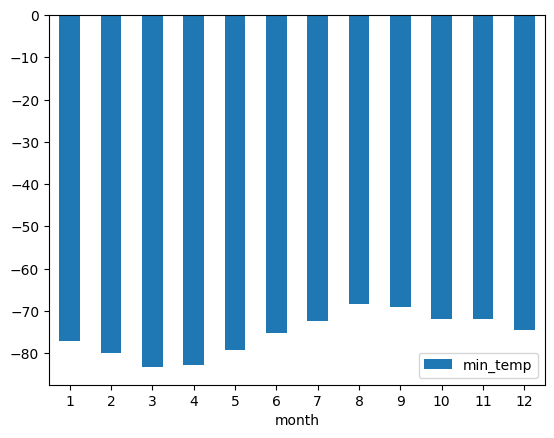

In [9]:
# Use groupby for month in the min_temp column to obtain the average for each month
mars_temps = mars_temps_df.groupby(by=['month'])["min_temp"].mean()
print(mars_temps)
print('--------')

# Print out the max and min temps
print('Max Temp: ', mars_temps.max())
print('Min Temp: ', mars_temps.min())
print('--------')

temps_df = pd.DataFrame(mars_temps)
mars_temps_chart = temps_df.plot.bar(rot=0)
mars_temps_chart

Question 4: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

Answer: Month 9 has the highest atmospheric pressure at 913.31
        Month 6 has the lowest atmospheric pressure at 745.10

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
--------
Max Temp:  913.3059701492538
Min Temp:  745.0544217687075
--------


<AxesSubplot: xlabel='month'>

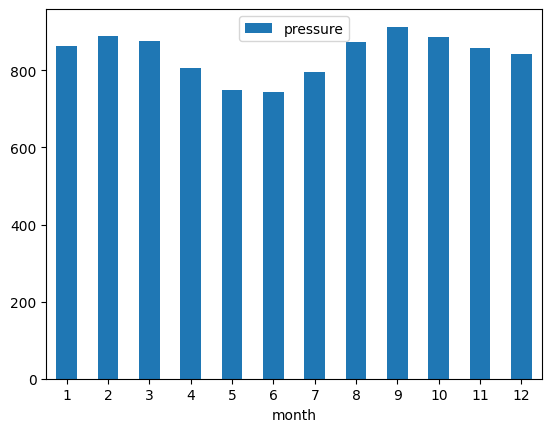

In [14]:
# Use groupby for month in the min_temp column to obtain the average for each month
mars_pressure = mars_temps_df.groupby(by=['month'])["pressure"].mean()
print(mars_pressure)
print('--------')

# Print out the max and min temps
print('Max Temp: ', mars_pressure.max())
print('Min Temp: ', mars_pressure.min())
print('--------')

pressure_df = pd.DataFrame(mars_pressure)
pressure_chart = pressure_df.plot.bar(rot=0)
pressure_chart

Question 5: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

In [13]:
mars_temps_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [ ]:
# Export to csv file